<a href="https://colab.research.google.com/github/harrysharma/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_Hari_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Annual preminum need to transform into log
#This is classification problem 
#I found driving license is not important feature we can remove it


# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer(Binary)

3. Age :	Age of the customer(Numeric)

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL(Binary)

5. Region_Code :	Unique code for the region of the customer(Catagorical)

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance(Binary)

7. Vehicle_Age :	Age of the Vehicle(Numeric)

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.(Binary)

9. Annual_Premium	: The amount customer needs to pay as premium in the year(Numeric)

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.(catagorical)

11. Vintage :	Number of Days, Customer has been associated with the company(Numeric)

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Capstone2_Supervised_Classification/Code/Data/main_data.csv')

##Basic check on data, features, null values, duplicates

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#Show me columns/features
list(data.describe().columns)

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [ ]:
#Show me basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Let's see Dupes in our data**

In [ ]:
#Shape before removing dupes
data.shape

(381109, 12)

In [ ]:
#Let's see for null values in data
data.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

 As **'id'** is unique in entire data set so, this feature does not make any difference in evaluation.

we can remove **id** from dataset set and further remove duplicate rows to reduce redundancy in dataset.

In [ ]:
#Make Copy of dataset and remove id 
df=data.copy()
df.drop('id',axis=1,inplace=True)

In [ ]:
#Shape before removing dupes
data.shape

(381109, 12)

In [ ]:
#CHECK for DUPES in DATA df
df.drop_duplicates(inplace=True)

In [ ]:
#SHAPE after removing dupes
df.shape

(380840, 11)



---



---



#EDA and filtering features

In [ ]:
#Segregate Feature on the basis of types(numeric, catagorical)
numerical_feat=['Age','Annual_Premium','Vintage']
catagorical_feat=list(set(df.columns)-set(numerical_feat)-{'Response'})
print(f"Numerical features : {numerical_feat}\n")
print(f"Catagorical features : {catagorical_feat}\n")


Numerical features : ['Age', 'Annual_Premium', 'Vintage']

Catagorical features : ['Region_Code', 'Driving_License', 'Policy_Sales_Channel', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Gender']



In [ ]:
#Define a function for unique catagorical values
def cat_uniq(x):
  lst=df[x].unique()
  print(f"Unique '{x}':{lst}\n")
for col in catagorical_feat:
  cat_uniq(col)

Unique 'Region_Code':[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Unique 'Driving_License':[1 0]

Unique 'Policy_Sales_Channel':[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57. 

In [ ]:
df['Policy_Sales_Channel'].value_counts().sort_values(axis=0,ascending=False)

152.0    134680
26.0      79646
124.0     73928
160.0     21769
156.0     10642
          ...  
149.0         1
143.0         1
123.0         1
41.0          1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [ ]:
#Define function for values counts for each class of features
def val_c(x):
  dicta=df[x].value_counts().sort_values(axis=0,ascending=False)
  print(f"{x}:\n{dicta}\n")
for col in catagorical_feat:
  val_c(col)

Region_Code:
28.0    106335
8.0      33857
46.0     19747
41.0     18256
15.0     13300
30.0     12177
29.0     11052
50.0     10237
3.0       9245
11.0      9229
36.0      8788
33.0      7647
47.0      7434
35.0      6939
6.0       6277
45.0      5603
37.0      5501
18.0      5150
14.0      4677
48.0      4654
39.0      4642
10.0      4372
21.0      4266
2.0       4037
13.0      4034
7.0       3275
12.0      3197
9.0       3101
27.0      2819
32.0      2784
43.0      2639
17.0      2616
26.0      2587
25.0      2502
24.0      2415
38.0      2026
0.0       2015
16.0      2005
23.0      1959
31.0      1948
20.0      1931
49.0      1831
4.0       1798
34.0      1663
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1006
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

Driving_License:
1    380028
0       812
Name: Driving_License, dtype: int64

Policy_Sales_Channel:
152.0    134680
26.0      79646
124.0     73928
160.0     2

**Observations**

*   All features(except driving_license) data evenly distributed except for few classes like in Region code:28, Policy_Sales_Channel:152
*   Driving License: Most of entries(99.8%) has driving license---This make this feature less important.




**Numerical Feature Analysis**(How individual feature looks?)

In [ ]:
#Describe our numerical features
df[numerical_feat].describe([.25,.5,.75,.9])

,Age,Annual_Premium,Vintage
count,380840.000000,380840.000000,380840.000000
mean,38.823593,30584.016078,154.344607
std,15.513206,17203.258664,83.670240
min,20.000000,2630.000000,10.000000
25%,25.000000,24426.000000,82.000000
50%,36.000000,31678.500000,154.000000
75%,49.000000,39408.000000,227.000000
90%,62.000000,48439.100000,270.000000
max,85.000000,540165.000000,299.000000


**Observations**


*   STD is significant for all numeric features
*   Annual Premium may have outliers due to high STD



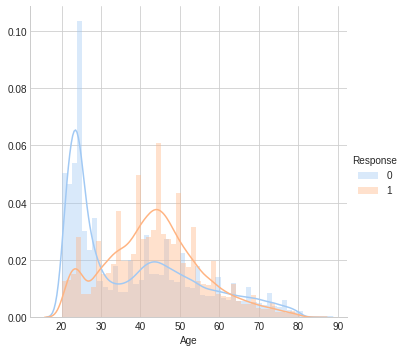

In [ ]:
sns.FacetGrid(df,hue='Response',size=5).map(sns.distplot,'Age').add_legend();
plt.show()

5 Point Summary of Age Attribute:
Age(min) : 20
Q1                    : 25.0
Q2(Median)            : 36.0
Q3                    : 49.0
Age(max) : 85
Total number of outliers in Age distribution: 0.
Skewness of Age: 0.6724953423629682.


<Figure size 1152x720 with 0 Axes>

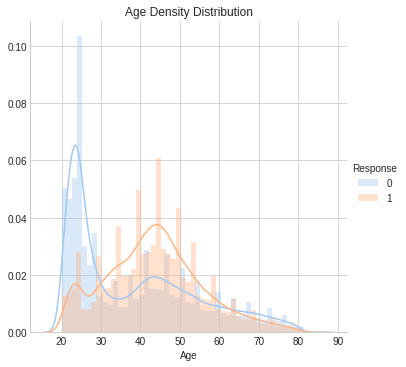

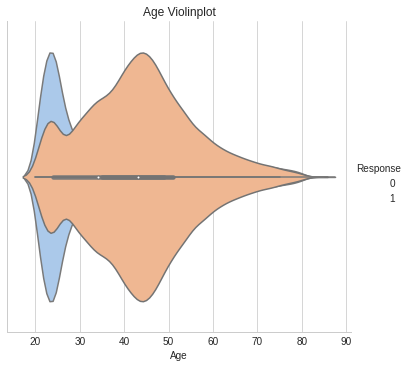

5 Point Summary of Annual_premium Attribute:
Annual_premium(min) : 2630.0
Q1                    : 24426.0
Q2(Median)            : 31678.5
Q3                    : 39408.0
Annual_premium(max) : 540165.0
Total number of outliers in Annual_Premium distribution: 10331.
Skewness of Annual_Premium: 1.7699758877598497.


<Figure size 1152x720 with 0 Axes>

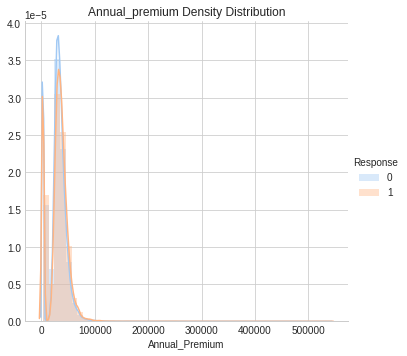

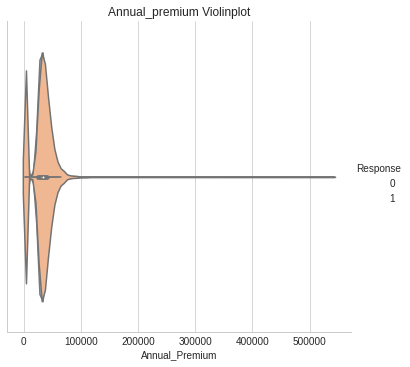

5 Point Summary of Vintage Attribute:
Vintage(min) : 10
Q1                    : 82.0
Q2(Median)            : 154.0
Q3                    : 227.0
Vintage(max) : 299
Total number of outliers in Vintage distribution: 0.
Skewness of Vintage: 0.00305128680797489.


<Figure size 1152x720 with 0 Axes>

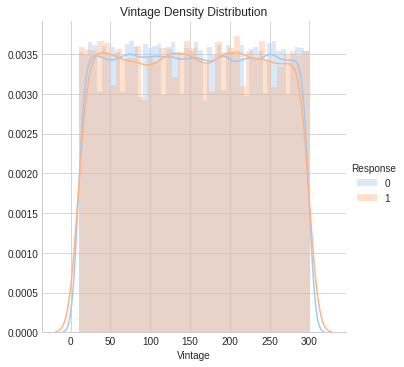

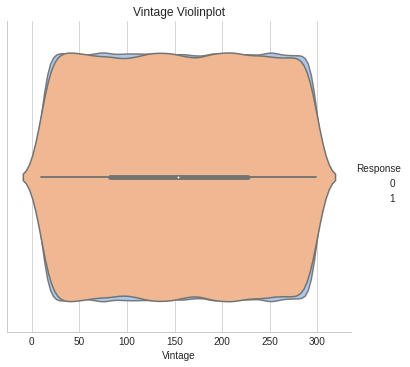

In [ ]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x,log_x=True):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()
    skew = df[x].skew()
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}\n'
          f'Total number of outliers in {x} distribution: {total_outlier_num}.\n'
          f'Skewness of {x}: {skew}.')   


    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    ax1=sns.FacetGrid(df,hue='Response',size=5).map(sns.distplot,x).add_legend();
    plt.title(f'{x.capitalize()} Density Distribution')
    
    ax2 = sns.FacetGrid(df,hue='Response',size=5).map(sns.violinplot,x,split = True).add_legend();
    plt.title(f'{x.capitalize()} Violinplot')
    
    # plt.subplot(223)
    # ax4 = sns.FacetGrid(df,hue='Response',size=5).map(sns.boxplot,x, palette = 'cool', width=0.7, linewidth=0.6).add_legend();
    # plt.title(f'{x.capitalize()} Boxplot')
    
    # plt.subplot(224)
    # ax5 = sns.FacetGrid(df,hue='Response',size=5).map(sns.kdeplot, x, cumulative=True).add_legend()
    # plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()


for col in numerical_feat:
  summary(col)

In [ ]:
from matplotlib.rcsetup import validate_fontsize
def cdf_pdf_plot(x):
  plt.figure(figsize=(10,5))
  df1=df[df['Response']==1]
  counts,bin_edges=np.histogram(df1[x],bins=10,density=True)
  pdf=counts/sum(counts)
  cdf=np.cumsum(pdf)
  ax1 = plt.plot(bin_edges[1:],pdf,label= 'PDF res=1')
  ax2 = plt.plot(bin_edges[1:],cdf,label= 'CDF res=1')

  df0=df[df['Response']==0]
  counts,bin_edges=np.histogram(df0[x],bins=10,density=True)
  pdf=counts/sum(counts)
  cdf=np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf,label= 'PDF res=0')
  plt.plot(bin_edges[1:],cdf, label= 'CDF res=0')
  plt.legend(loc=7,fontsize=10)
  plt.title(f'PDF & CDF plot for {x}',fontsize=14)
  plt.xlabel(x, fontsize=12)
  plt.show()

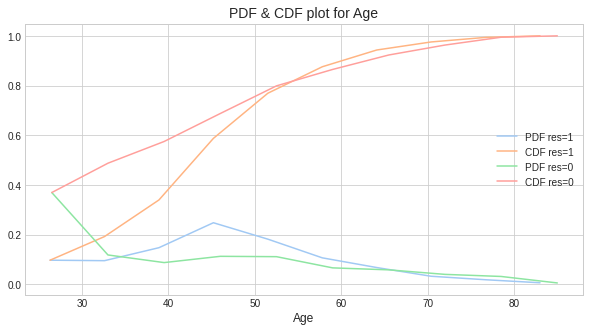

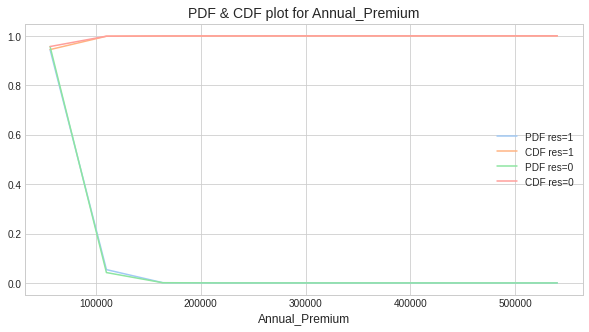

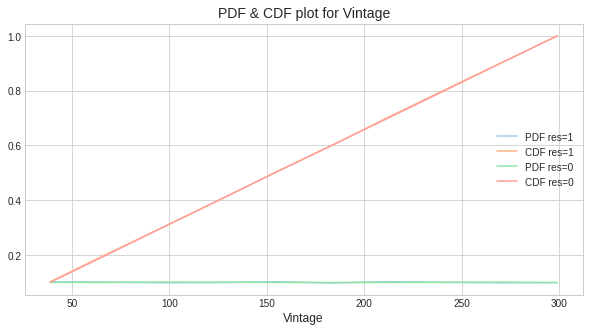

In [ ]:
for col in numerical_feat:
  cdf_pdf_plot(col)

**Catagorical feature analysis**

In [ ]:
catagorical_feat

['Region_Code',
 'Driving_License',
 'Policy_Sales_Channel',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Gender']

In [ ]:
#As we have high catagories feature we seperate them
high_cat={'Policy_Sales_Channel','Region_Code'}
new_cat=set(catagorical_feat)-{'Policy_Sales_Channel','Region_Code'}

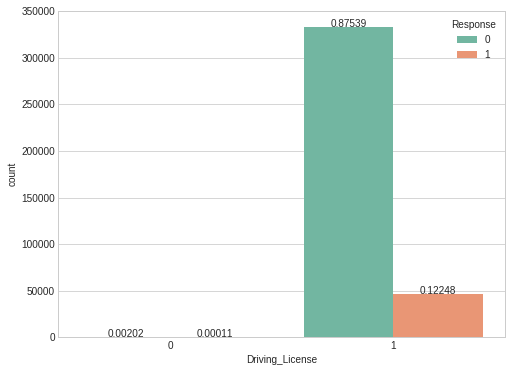

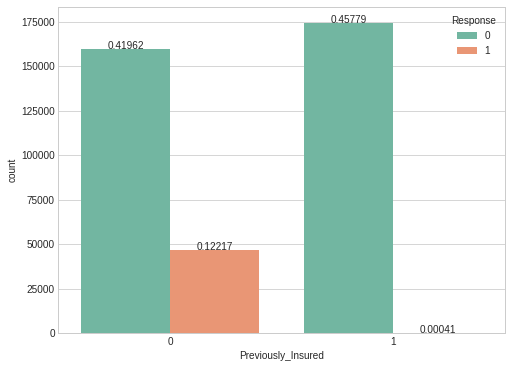

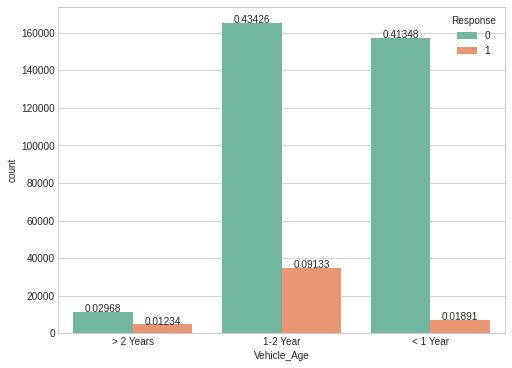

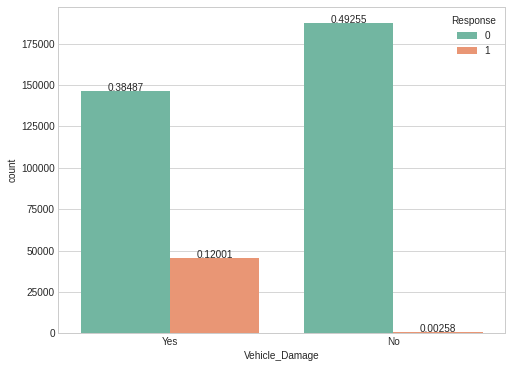

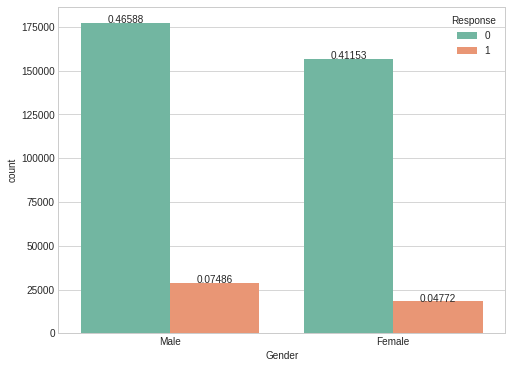

In [ ]:
#let's write a function to plot countplot for catagorical varibles 
def count_plot(x,size):
  # Taking into account total available values (Setting one person per row):
  total = float(len(df))
  fig,ax= plt.subplots(figsize=size)
  # Plotting our figure (keeping it simple):
  sns.countplot(x=x,hue='Response',data=df, palette="Set2",ax=ax,orient='v')

  # Looping over entire Titanic dataset:
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.5f}'.format(height/total), ha="center")

for col in new_cat:
  fig_size=(8,6)
  count_plot(col,fig_size)

In [ ]:
df[df['Driving_License']==1].shape

(380028, 11)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

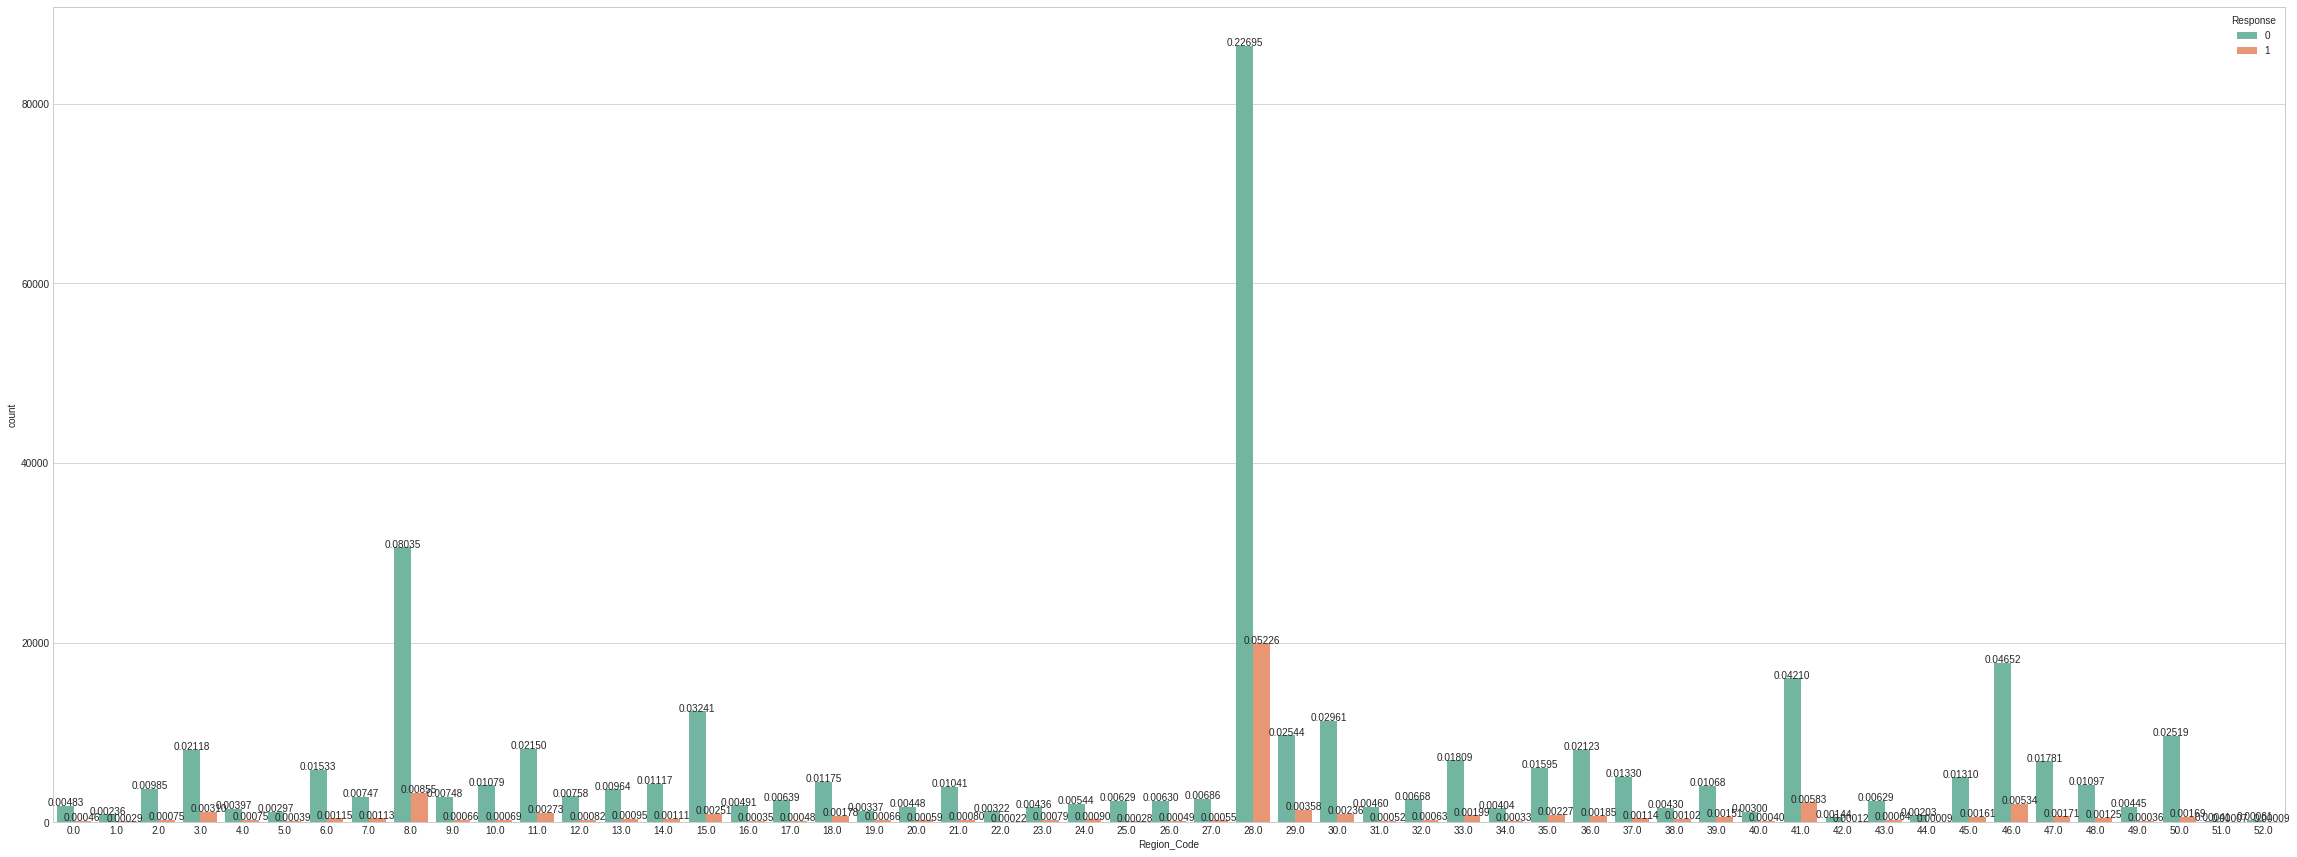

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

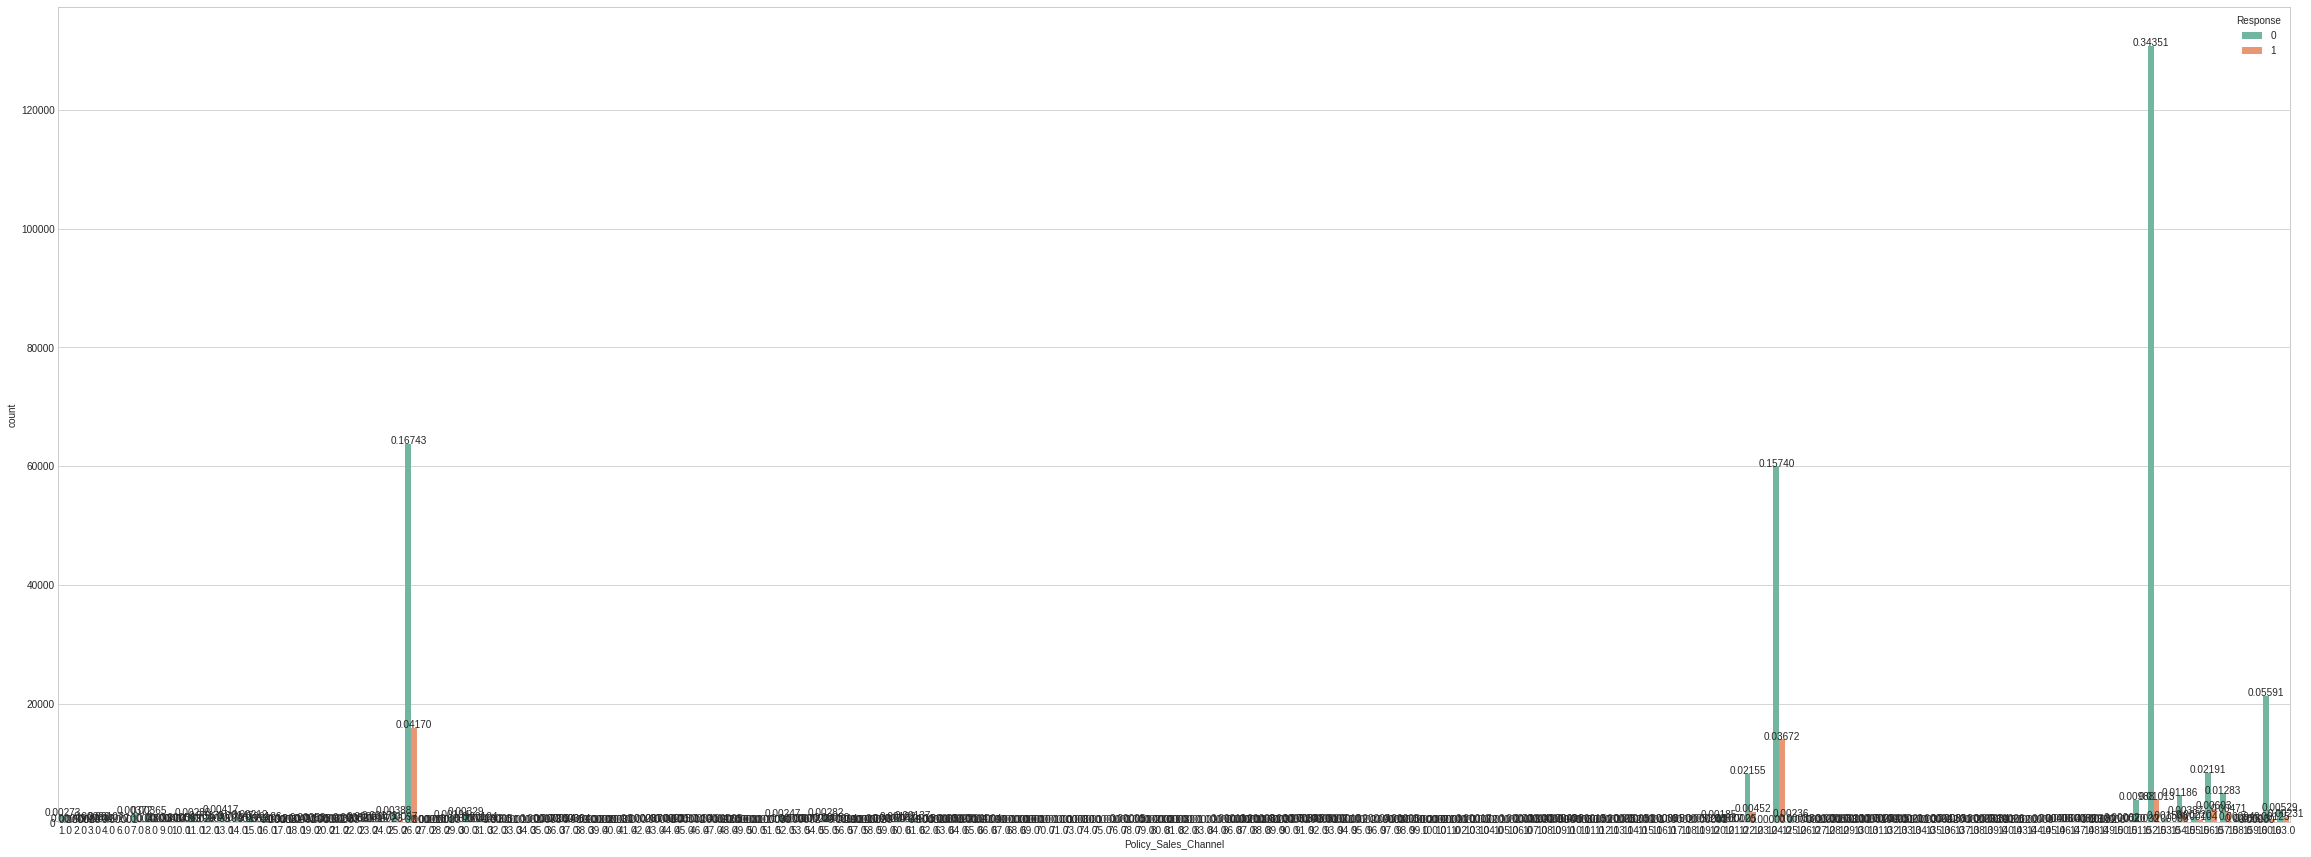

In [ ]:
# Now plot for high catagory features
size=(40,15)
for col in high_cat:
  count_plot(col,size)



---



---



---



In [ ]:
df.replace({'Vehicle_Age':{'> 2 Years':1,'1-2 Year':2,'< 1 Year':3},
            'Gender':{'Male':0,'Female': 1},
            'Vehicle_Damage':{'Yes':1,'No':0}},inplace=True)

In [ ]:
# Let's create numpy arrays for features and target
X = df.drop('Response',axis=1).values
y = df['Response'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

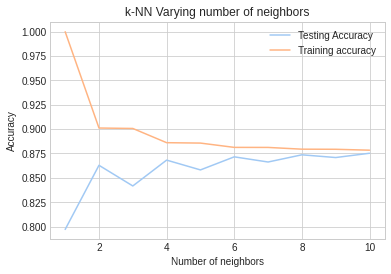

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.8752494485873332

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred) 

array([[133201,    461],
       [ 18543,    131]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

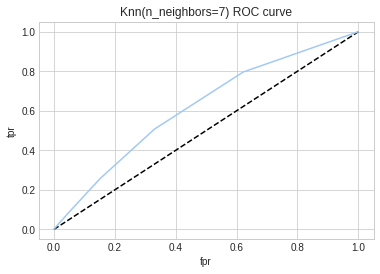

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.617634636556948

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[10,14,18,25,35,45]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [10, 14, 18, 25, 35, 45]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

0.8774157126352276

In [ ]:
knn_cv.best_params_

{'n_neighbors': 45}